In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
import seaborn as sns
from scipy.stats import zscore
from nilearn import datasets
from nilearn.plotting import (plot_anat, plot_epi, plot_roi,
                              plot_glass_brain, plot_stat_map,
                              plot_surf_stat_map, plot_img_on_surf)
from nilearn.image import mean_img
from nilearn.surface import vol_to_surf
from nilearn.masking import apply_mask
from glob import glob

sns.set_context('talk')

/usr/people/ye9829/.conda/envs/502b/lib/python3.9/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Visualize sub-002

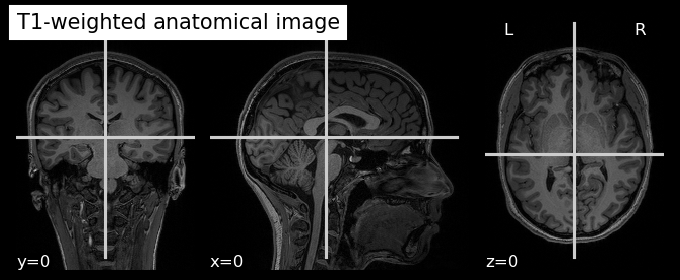

In [2]:
# anatomical image
data_path = '/jukebox/PNI-classes/students/NEU502/2023-NEU502B/wlong/multilang/data/bids/'
anat_path = os.path.join(data_path, 'sub-002/ses-01/anat/sub-002_ses-01_T1w.nii.gz')

# Plot the anatomical image
cut_coords = (0, 0, 0)
plot_anat(anat_path, cut_coords=cut_coords, title='T1-weighted anatomical image');

data shape: (78, 78, 54, 630)


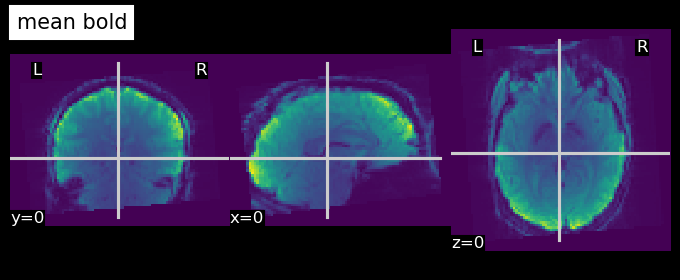

In [3]:
# Plot the mean EPI image
func_path = os.path.join(data_path, 'sub-002/ses-01/func/sub-002_ses-01_task-language_bold.nii.gz')
plot_epi(mean_img(func_path), cut_coords=cut_coords, cmap='viridis', title='mean bold');
func_data = nib.load(func_path).get_fdata()
n_trs = func_data.shape[3]
print('data shape:', func_data.shape)

/tmp/ipykernel_51978/1432581594.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stim_df.word[stim_df.word.isnull()] = stim_df.StimFile[stim_df.word.isnull()]


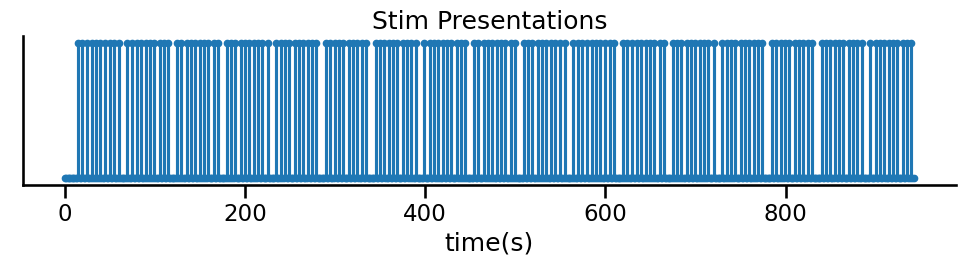

In [4]:
stim_df = pd.read_csv('/jukebox/PNI-classes/students/NEU502/2023-NEU502B/wlong/multilang/stimulus_record/780929_502b_project_code_edited_2023-04-05_13h44.30.136.csv')
t_scan_start = stim_df['key_resp.started'][0] + stim_df['key_resp.rt'][0]
stim_df.Language = stim_df.Language.str.split('_', expand=True).iloc[:, 0]  # isolating just the language name
stim_df.stimFile = stim_df.stimFile.str.split('/|_', expand=True).iloc[:, 1]
stim_df.StimFile = stim_df.StimFile.str.split('/|_', expand=True).iloc[:, 1]
stim_df['word'] = stim_df.stimFile
stim_df.word[stim_df.word.isnull()] = stim_df.StimFile[stim_df.word.isnull()]
stim_df = stim_df[~stim_df.word.isnull()].reset_index(drop=True)

tr = 1.5
time = np.arange(0, n_trs*tr, tr)
stim_trs, _ = np.histogram(stim_df['Sound.started']-t_scan_start, bins=time)  # stims binned into TRs (have not adjusted for if they are presented right at the end of a TR)

fig, ax = plt.subplots(figsize=(10, 3))
ax.stem(time[:-1], stim_trs, markerfmt='.', basefmt='C0')
ax.set_xlabel('time(s)')
ax.set_title('Stim Presentations')
ax.set_yticks([])
plt.tight_layout()
sns.despine()


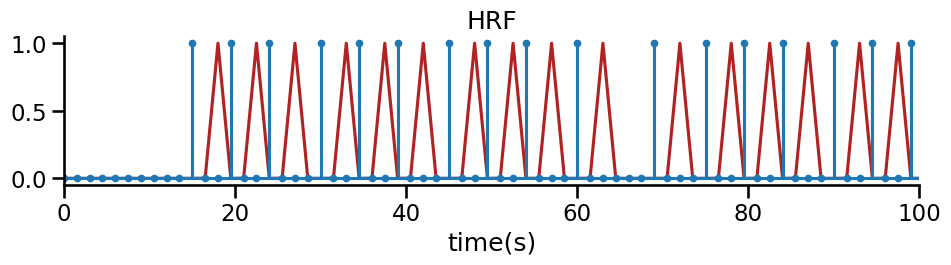

In [13]:
# Convolve with HRF:
from nilearn.glm.first_level import glover_hrf
%matplotlib inline
hrf = glover_hrf(tr, oversampling=1, time_length=4) # don't know what we should do w this bc our presentations are so fast
blocks_hrf = np.convolve(stim_trs, hrf)[:n_trs]
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(time[:], blocks_hrf, 'firebrick')
ax.stem(time[:-1], stim_trs, markerfmt='.', basefmt='C0')
ax.set_xlim([0, 100])
ax.set_xlabel('time(s)')
ax.set_title('HRF')
plt.tight_layout()
sns.despine()
plt.show()

## Visualize sub-005

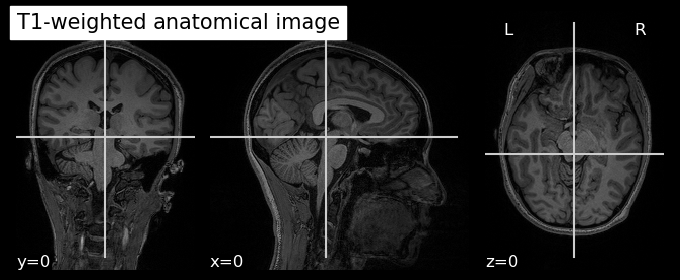

In [27]:
# anatomical image
data_path = '/jukebox/PNI-classes/students/NEU502/2023-NEU502B/wlong/multilang/data/bids/'
anat_path = os.path.join(data_path, 'sub-005/ses-01/anat/sub-005_ses-01_T1w.nii.gz')

# Plot the anatomical image
cut_coords = (0, 0, 0)
plot_anat(anat_path, cut_coords=cut_coords, title='T1-weighted anatomical image');

data shape: (78, 78, 54, 27)


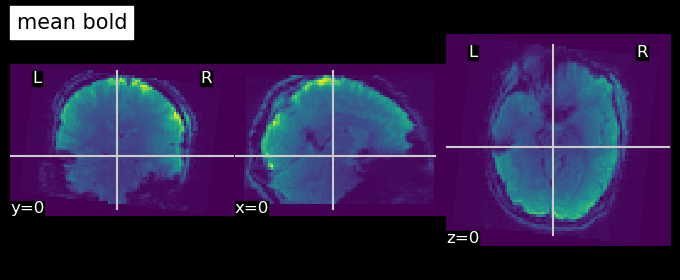

In [32]:
# Plot the mean EPI image
func_path = os.path.join(data_path, 'sub-005/ses-01/func/sub-005_ses-01_task-language_bold.nii.gz')
plot_epi(mean_img(func_path), cut_coords=cut_coords, cmap='viridis', title='mean bold');
print('data shape:', nib.load(func_path).get_fdata().shape)